In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [72]:
australia=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/australia_BEC_export.csv')
china=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/china_BEC_export.csv')
germany=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/germany_BEC_export.csv')
india=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/india_BEC_export.csv')
japan=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/japan_BEC_export.csv')
korea=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/korea_BEC_export.csv')
russian=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/russian_BEC_export.csv')
saudi=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/saudi_BEC_export.csv')
singapore=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/singapore_BEC_export.csv')
taipei=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/taipei_BEC_export.csv')
usa=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/usa_BEC_export.csv')
vietnam=pd.read_csv('/Users/ejju/Desktop/2nd_project/export_import/Total_country_BEC_export/vietnam_BEC_export.csv')

In [73]:
export=pd.concat([australia,china,germany,india,japan,korea,russian,saudi,singapore,taipei,usa,vietnam])

In [74]:
export.drop(['HS'],axis=1, inplace=True) #불필요한 열 삭제
export.drop(['level_0'],axis=1, inplace=True)

In [80]:
export['BEC']=export['BEC'].str.replace('xx', '', True)
export['BEC']=export['BEC'].str.replace('x', '', True)

In [81]:
export

country     BEC      2012      2013      2014      2015      2016  \
0   australia    1111  13432460  13504826  12427181  11117044   9692497   
1   australia  111210   3726545   3859362   3842381   3208864   2968681   
2   australia  111220     12368     15491     22415     16712     16494   
3   australia  112010    533918    514098    506938    423182    380499   
4   australia  113101  15344079  16152621  18181124  18377600  17154737   
..        ...     ...       ...       ...       ...       ...       ...   
61    vietnam  811220      4194      1734      1900      1822      1809   
62    vietnam  812020      7606      9803     11147      8191      1439   
63    vietnam  813101       217       206       227        13         0   
64    vietnam  813201         0         0         0         0         0   
65    vietnam  813202      8691      9050      9870      6233      7121   

        2017      2018      2019      2020      2021  
0   11662865   9782926   7996960   7982204  15730831  
1    3136201   3252616   3161341   3280341   4155267  
2      21243     24413     21833     23775     20515  
3     410047    445149    455219    437523    488063  
4   19638423  19431366  20575949  19044404  21205427  
..       ...       ...       ...       ...       ...  
61      1743      1367      1065       894      6054  
62      3630      2741      3299      2012      8129  
63         0         0         0         0        27  
64         0         0         0         0         0  
65      7631     10246     20251     21297     15622  

[785 rows x 12 columns]

In [82]:
#export.to_csv('all_export_lr.csv', index=False)

In [56]:
#독립변수 X와 종속변수 Y로 분리
dataset=export.values
X=dataset[:,2:]
Y=dataset[:,1]

In [57]:
#예측 테스트를 위해 train 데이터와 test 데이터로 나눔
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

In [58]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,Y_train) #학습데이터를 가지고 다중선형모델을 생성

LinearRegression()

In [ ]:
#보스턴 집값처럼 만약 내가 독립변수의 값들을 입력하면 종속변수의 값을 예측해 줌
#X_Jan2022=[[cn_export값, usa_export값, vn_export값, hk_export값, jp_export값]]
#Y_Jan2022=mlr.predict(X_Jan2022)

#이 과제에서는 cn_export값, usa_export값, vn_export값, hk_export값, jp_export값들을 다른 분석기법으로 예측하고(예-시계열분석)
#그 결과값을 이 다중선형회귀 모델에 넣어 Y_Jan2022를 예측할 수 있을 듯(Y-Feb2022이후도 마찬가지!!!!!!!!!!!!!!!!!!!!!)

In [59]:
#예측성능평가-예측값과 실제 정답(Y_test)을 비교해보기 위해 test 데이터를 이용하여 예측해보기
Y_predict=mlr.predict(X_test)

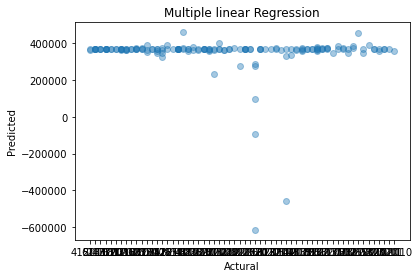

In [61]:
#matplotlib을 이용한 시각화로 간단히 확인해보기
#x축은 실제 임대료(Y_test), y축은 예측한 임대로(Y_predict)
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_predict, alpha=0.4)
plt.xlabel('Actural')
plt.ylabel('Predicted')
plt.title('Multiple linear Regression')
plt.show()

In [62]:
mlr.coef_ #회귀계수 확인하기

array([ 8.80188435e-06, -7.78370899e-04, -4.95070518e-03, -6.50682230e-03,
        1.98230465e-02, -3.11283380e-03, -1.77145677e-03, -4.58404933e-03,
        1.68099425e-03,  1.63653128e-03])

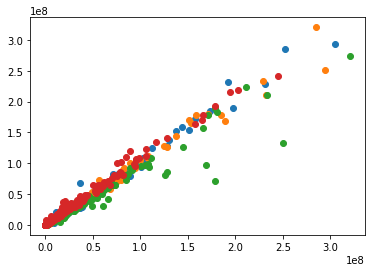

In [69]:
#회귀계수만으로 어떤 변수가 중요한지 감이 안 오는 경우 변수들과 total_export간의 상관을 살펴볼 수 있음
plt.scatter(export['2012'],export['2013'])
plt.scatter(export['2013'],export['2014'])
plt.scatter(export['2014'],export['2015'])
plt.scatter(export['2016'],export['2017'])

In [70]:
#모델의 정확도 평가하기-다중선형회귀모델의 정확도를 평가할 때는 잔차분석을 하면 됨
#sklearn의 linear_model.LinearRegression을 사용해서 모델을 생성하면 .score()라는 결정계수를 돌려주는 메서드를 사용할 수 있음
mlr.score(X_train,Y_train)

0.02161064580929728

In [ ]:
#결정계수가 0.98이라는 것은 total_export의 98%는 5개의 변수(cn_export값, usa_export값, vn_export값, hk_export값, jp_export값)로 설명할 수 있다는 의미임